# MA(1)

$$ Y(n) - \mu = \theta \epsilon(n-1) + \epsilon(n) $$

Simulate time series

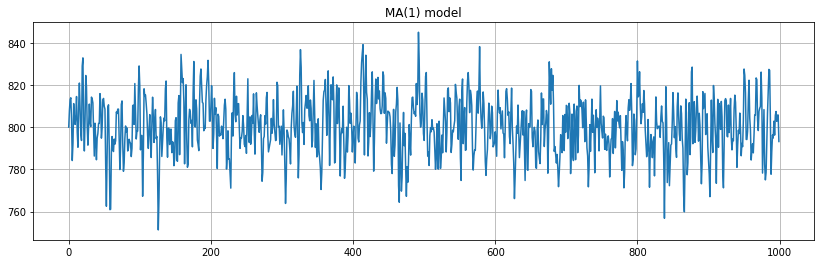

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
SIGMA_EPS = 10
THETA = [0.9]
MU = 800

epsilon = np.random.normal(scale=SIGMA_EPS, size=(N,))
Y = np.ones((N,))*MU
for n in range(1,len(epsilon)):
    Y[n] = MU + THETA[0]*epsilon[n-1] + epsilon[n]
plt.figure(figsize=(14,4))
plt.plot(Y)
plt.title('MA(1) model')
plt.grid()
plt.show()

## Autocorrelation function (ACF)

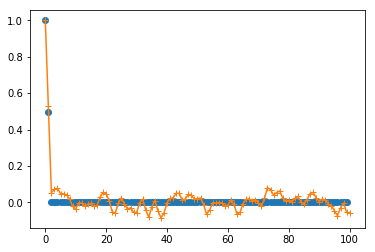

In [10]:
from statsmodels.tsa.stattools import acf


# theoretical ACF
theoretical = np.zeros((100,))
theoretical[0] = 1
theoretical[1] = THETA[0]/(THETA[0]**2+1)
plt.plot(theoretical, 'o')
# from statsmodel
acf_sm, qstat, pval = acf(Y, nlags=100, qstat=True)
plt.plot(acf_sm, '-+')
plt.show()


## Model Estimation

In [11]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Y, (0,0,1)).fit()
print (model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -3698.544
Method:                       css-mle   S.D. of innovations              9.765
Date:                Tue, 30 May 2017   AIC                           7403.088
Time:                        20:34:57   BIC                           7417.811
Sample:                             0   HQIC                          7408.684
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        800.4604      0.584   1370.868      0.000     799.316     801.605
ma.L1.y        0.8918      0.013     66.690      0.000       0.866       0.918
                                    Roots           

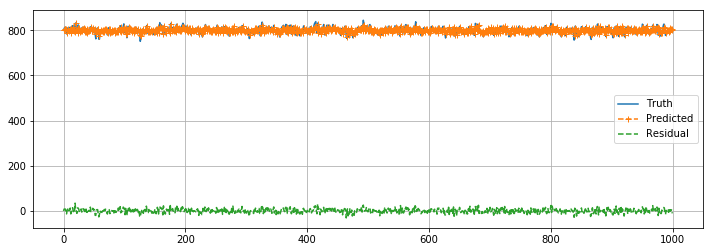

In [12]:
# Plot the residuals and test for their correlation
plt.figure(figsize=(12,4))
plt.plot(Y)
plt.plot(model.fittedvalues, '--+')
plt.plot(model.resid, '--')
plt.grid()
plt.legend(['Truth', 'Predicted', 'Residual'])
plt.show()

## Residual analysis

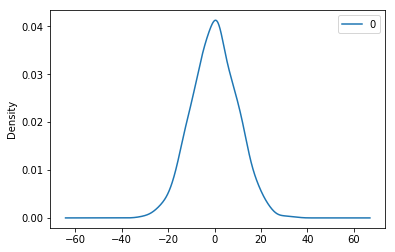

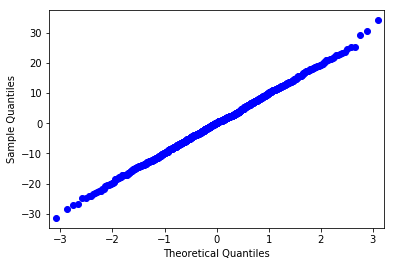

In [13]:
import pandas as pd
from statsmodels.api import qqplot

resid_df = pd.DataFrame(model.resid)
resid_df.plot(kind='kde')
qqplot(model.resid)
plt.show()

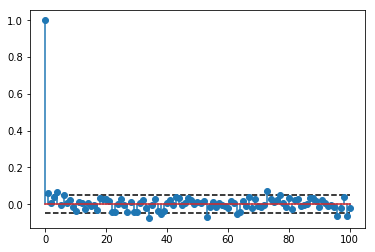

In [14]:
acf_res, qstat, pval = acf(model.resid, nlags=100, qstat=True)
plt.stem(acf_res,)
plt.hlines(0.05, 0,100, linestyle='dashed')
plt.hlines(-0.05, 0,100, linestyle='dashed')
plt.show()

## Forecasting

In [15]:
yhat, std_err, confint = model.forecast()
print ("Predicted value = {}, StdErr = {}, Confidence Interval = {}".format(yhat, std_err, confint))

Predicted value = [ 790.44417643], StdErr = [ 9.76507707], Confidence Interval = [[ 771.30497706  809.58337579]]
